In [61]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
print(np.log(1/0.95))
print(np.log(1/0.0499))
print(np.log(1/0.0001))

0.05129329438755048
2.997734276224664
9.210340371976184


In [7]:
print(np.log2(1/0.95))
print(np.log2(1/0.0499))
print(np.log2(1/0.0001))

0.07400058144377678
4.324816374212189
13.287712379549449


In [8]:
print(np.log10(1/0.95))
print(np.log10(1/0.0499))
print(np.log10(1/0.0001))

0.022276394711152208
1.30189945437661
4.0


In [9]:
print((np.log(1/(2/5))*(2/5)) + 3*(np.log(1/(1/5))*(1/5)))

1.3321790402101223


In [21]:
phone = np.genfromtxt('Data/time_until_phone_drop.csv', delimiter=',')

In [35]:
def p(x):
    return (1/np.mean(phone)) * np.exp(-(1/np.mean(phone)) * x)

def f(x):
    return p(x) * np.log(1/p(x))

ans, error = quad(f, np.min(phone), np.max(phone))
ans

0.8768340889934707

In [36]:
entropy_sum = 0
for i in phone:
    entropy_sum += np.log(1/p(i))

print((1/len(phone))*(entropy_sum))

0.8880500438090554


In [39]:
print((0*np.log(1/0.2)) + (1*np.log(1/0.8)))

0.22314355131420976


In [52]:
def entropy(p, q):
    return p*np.log(1/q)

print('p(x) entropy:', entropy(0.6, 0.6) + entropy(0.4, 0.4))
print('p(y) entropy:', entropy(0.3, 0.3) + entropy(0.5, 0.5)+ entropy(0.2, 0.2))
print('Cross Entropy:', entropy(1/6, 1/2) + entropy(2/3, 1/4) + entropy(1/6, 1/4))
KLD = (1/6) * np.log((1/6)/(1/2)) + (2/3) * np.log((2/3)/(1/4))+ (1/6) * np.log((1/6)/(1/4))
print("KL Divergence:", KLD)
print("Entropy:", 2*entropy(1/6, 1/6) + entropy(2/3, 2/3))
print("You cannot divide something by 0, so a 0 probability will make the entropy equation undefined")

p(x) entropy: 0.6730116670092565
p(y) entropy: 1.0296530140645737
Cross Entropy: 1.2707698310265663
KL Divergence: 0.4032066025451051
Entropy: 0.8675632284814612
You cannot divide something by 0, so a 0 probability will make the entropy equation undefined


In [49]:
dating_female = np.genfromtxt('Data/Age meeting a partner/age_met_dating_females.csv', delimiter=',')
dating_male = np.genfromtxt('Data/Age meeting a partner/age_met_dating_males.csv', delimiter=',')
married_female = np.genfromtxt('Data/Age meeting a partner/age_met_married_female.csv', delimiter=',')
married_male = np.genfromtxt('Data/Age meeting a partner/age_met_married_males.csv', delimiter=',')

In [58]:
np.std(married_female)

8.881470019888248

In [62]:
def p(x, data, σ): 
	kde_sum = 0
	for μᵢ in data:
		kde_sum += norm.pdf(x, μᵢ, σ)
	return kde_sum/len(data)

def p1(x): return p(x, dating_female, np.std(dating_female))
def p2(x): return p(x, dating_male, np.std(dating_male))
def p3(x): return p(x, married_female, np.std(married_female))
def p4(x): return p(x, married_male, np.std(married_male))

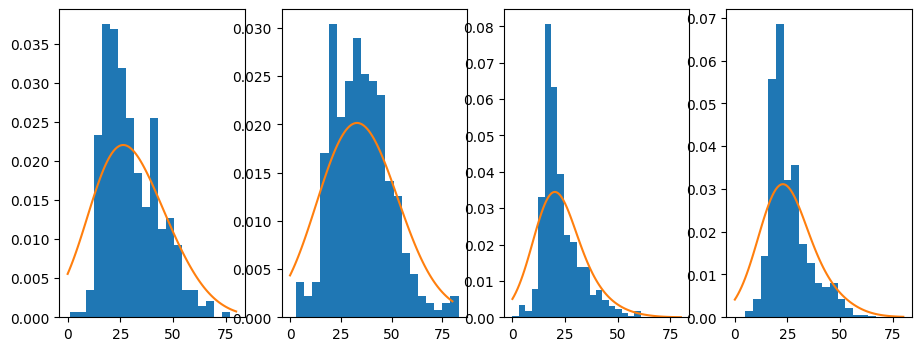

In [63]:
x = np.linspace(0, 80, 100)

plt.figure(figsize=(11,4))
plt.subplot(141)
plt.hist(dating_female, density=True, bins=20)
y = p1(x)
plt.plot(x, y)
plt.subplot(142)
plt.hist(dating_male, density=True, bins=20)
y = p2(x)
plt.plot(x, y)
plt.subplot(143)
plt.hist(married_female, density=True, bins=20)
y = p3(x)
plt.plot(x, y)
plt.subplot(144)
plt.hist(married_male, density=True, bins=20)
y = p4(x)
plt.plot(x, y)
plt.show()